# GTI DIRINT Examples

This notebook shows a few examples of the pvlib python implementation of the GTI DIRINT algorithm.

Authors: Will Holmgren (@wholmgren), University of Arizona (2017, 2018).

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = 8, 5
mpl.rcParams['figure.dpi'] = 100

import pandas as pd
import numpy as np

import pvlib
from pvlib.location import Location
from pvlib.pvsystem import PVSystem
from pvlib.modelchain import ModelChain
from pvlib.tracking import SingleAxisTracker
from pvlib.tools import cosd

pvlib.__version__

'0.5.2+24.gd856205.dirty'

Use a clear sky algorithm to generate some POA data.

In [2]:
times = pd.DatetimeIndex(start='20160606', end='20160607', tz='America/Phoenix', freq='1min')

In [3]:
location = Location(32.2, -110.9, altitude=700)

In [4]:
pressure = pvlib.atmosphere.alt2pres(location.altitude)

In [5]:
solpos = location.get_solarposition(times)

In [6]:
cs = location.get_clearsky(times, solar_position=solpos)

In [7]:
dni, ghi, dhi = cs['dni'], cs['ghi'], cs['dhi']

In [8]:
solar_zenith, solar_azimuth = solpos['zenith'], solpos['azimuth']

In [9]:
surface_tilt = 40
surface_azimuth = 180
system = PVSystem(surface_tilt=surface_tilt, surface_azimuth=surface_azimuth)

In [10]:
aoi = system.get_aoi(solar_zenith, solar_azimuth)

In [11]:
# note that this method will use the haydavies transposition model by default,
# however the gti_dirint function will use perez by default.
all_irrad = system.get_irradiance(solar_zenith, solar_azimuth, dni, ghi, dhi)

In [12]:
poa_global = all_irrad['poa_global']

Text(0,0.5,'AOI (deg)')

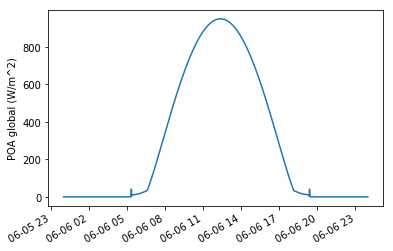

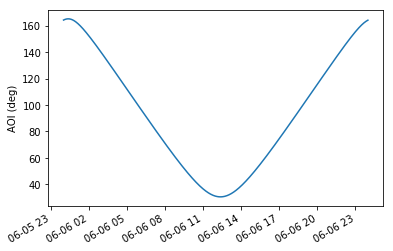

In [13]:
poa_global.plot()
plt.ylabel('POA global (W/m^2)')

plt.figure()
aoi.plot()
plt.ylabel('AOI (deg)')

In [14]:
gti_dirint_out = pvlib.irradiance.gti_dirint(
    poa_global, aoi, solar_zenith, solar_azimuth,
    times, surface_tilt, surface_azimuth,
    pressure=pressure,
    use_delta_kt_prime=True, temp_dew=None, albedo=.25,
    model='perez', model_perez='allsitescomposite1990',
    calculate_gt_90=True, max_iterations=30)

/Users/holmgren/git_repos/pvlib2/pvlib-python/pvlib/irradiance.py:1606: RuntimeWarning: 42 points failed to converge after 30 iterations.best_diff:
2016-06-06 06:36:00-07:00      26.508631
2016-06-06 06:37:00-07:00      29.291455
2016-06-06 06:38:00-07:00      32.111355
2016-06-06 06:39:00-07:00    9999.000000
2016-06-06 06:40:00-07:00      22.996813
2016-06-06 06:43:00-07:00       1.929001
2016-06-06 06:44:00-07:00       6.082760
2016-06-06 06:45:00-07:00       7.276500
2016-06-06 06:46:00-07:00       6.904495
2016-06-06 06:47:00-07:00       5.357397
2016-06-06 06:48:00-07:00       3.248952
2016-06-06 06:49:00-07:00       1.617537
2016-06-06 06:56:00-07:00       2.062054
2016-06-06 06:57:00-07:00       3.342510
2016-06-06 06:58:00-07:00       3.819609
2016-06-06 06:59:00-07:00       1.587115
2016-06-06 07:06:00-07:00       2.369954
2016-06-06 07:07:00-07:00       3.139187
2016-06-06 07:08:00-07:00       4.143722
2016-06-06 07:09:00-07:00       2.391045
2016-06-06 17:35:00-07:00       

In [15]:
color = ['b', 'g', 'r']

Text(0.5,1,'GTI DIRINT irrad (solid) vs. Original irrad (dashed)')

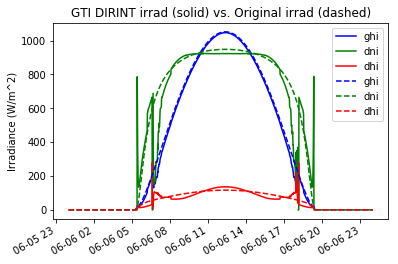

In [16]:
fig, ax = plt.subplots()
gti_dirint_out.plot(ax=ax, color=color)
cs.plot(ax=ax, ls='--', color=color)
ax.set_ylabel('Irradiance (W/m^2)')
ax.set_title('GTI DIRINT irrad (solid) vs. Original irrad (dashed)')

Repeat for summer solstice, fall equinox, winter solstice.

In [17]:
times_jun = pd.DatetimeIndex(start='20160621', end='20160622', tz='America/Phoenix', freq='1min')
times_sep = pd.DatetimeIndex(start='20160921', end='20160922', tz='America/Phoenix', freq='1min')
times_dec = pd.DatetimeIndex(start='20161221', end='20161222', tz='America/Phoenix', freq='1min')

times = times_jun.append(times_sep).append(times_dec)

In [18]:
solpos = location.get_solarposition(times)

In [19]:
cs = location.get_clearsky(times, solar_position=solpos)

In [20]:
dni, ghi, dhi = cs['dni'], cs['ghi'], cs['dhi']

In [21]:
solar_zenith, solar_azimuth = solpos['zenith'], solpos['azimuth']

In [22]:
surface_tilt = 40
surface_azimuth = 180
system = PVSystem(surface_tilt=surface_tilt, surface_azimuth=surface_azimuth)

In [23]:
aoi = system.get_aoi(solar_zenith, solar_azimuth)

In [24]:
# note that this method will use the haydavies transposition model by default,
# however the gti_dirint function will use perez by default.
all_irrad = system.get_irradiance(solar_zenith, solar_azimuth, dni, ghi, dhi)

In [25]:
poa_global = all_irrad['poa_global']

In [26]:
aoi_lt_90 = aoi < 90

In [27]:
gti_dirint_out = pvlib.irradiance.gti_dirint(
    poa_global, aoi, solar_zenith, solar_azimuth,
    times, surface_tilt, surface_azimuth,
    pressure=pressure,
    use_delta_kt_prime=True, temp_dew=None, albedo=.25,
    model='perez', model_perez='allsitescomposite1990',
    calculate_gt_90=True, max_iterations=30)

/Users/holmgren/git_repos/pvlib2/pvlib-python/pvlib/irradiance.py:1606: RuntimeWarning: 246 points failed to converge after 30 iterations.best_diff:
2016-06-21 06:40:00-07:00      28.898083
2016-06-21 06:41:00-07:00      31.660065
2016-06-21 06:42:00-07:00      34.457472
2016-06-21 06:43:00-07:00    9999.000000
2016-06-21 06:44:00-07:00       2.309698
2016-06-21 06:45:00-07:00       3.710598
2016-06-21 06:46:00-07:00       1.487491
2016-06-21 06:47:00-07:00      24.457618
2016-06-21 06:48:00-07:00       6.008959
2016-06-21 06:49:00-07:00       7.237521
2016-06-21 06:50:00-07:00      43.965974
2016-06-21 06:51:00-07:00      45.289279
2016-06-21 06:52:00-07:00       2.783794
2016-06-21 07:00:00-07:00       1.783696
2016-06-21 07:01:00-07:00       3.498032
2016-06-21 07:02:00-07:00       2.143969
2016-06-21 07:03:00-07:00       1.818313
2016-06-21 07:10:00-07:00       2.173909
2016-06-21 07:11:00-07:00       3.229831
2016-06-21 07:12:00-07:00       4.691009
2016-06-21 07:13:00-07:00      

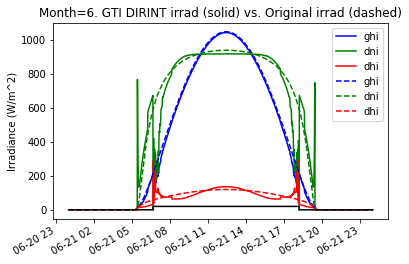

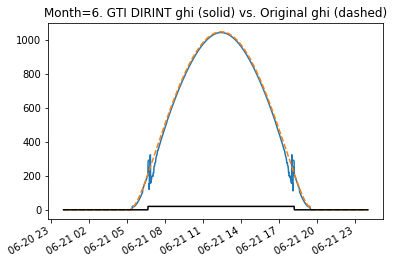

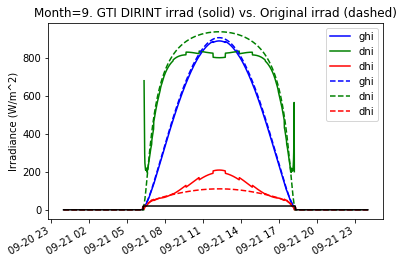

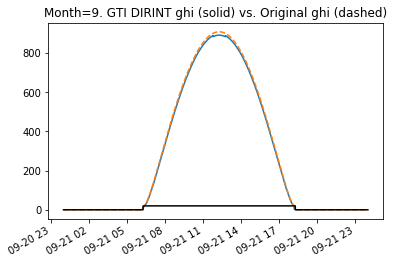

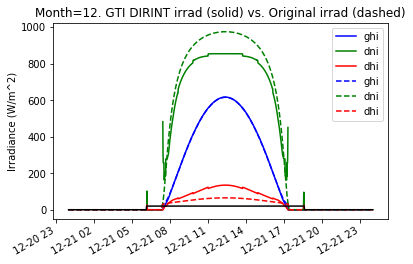

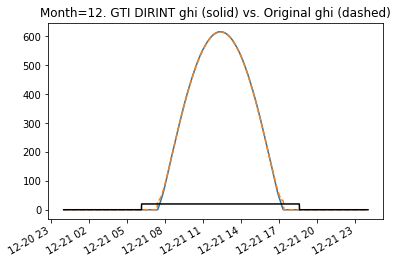

In [28]:
for month, data in gti_dirint_out.groupby(times.month):
    fig, ax = plt.subplots()
    data.plot(ax=ax, color=color)
    cs.loc[data.index].plot(ax=ax, ls='--', color=color)
    (aoi_lt_90 * 20).loc[data.index].plot(color='k')  # please excuse the sloppy reuse of the axis
    ax.set_ylabel('Irradiance (W/m^2)')
    ax.set_title('Month={}. GTI DIRINT irrad (solid) vs. Original irrad (dashed)'.format(month))

    fig, ax = plt.subplots()
    data['ghi'].plot(ax=ax)
    cs.loc[data.index]['ghi'].plot(ax=ax, ls='--')
    (aoi_lt_90 * 20).loc[data.index].plot(color='k')
    ax.set_title('Month={}. GTI DIRINT ghi (solid) vs. Original ghi (dashed)'.format(month))